# Challenge
Step 1: Repeat 1D gradient descent to find the minimum of the following function:
$$f(x)=\cos(2\pi x)+x^2$$
$$x\in\{-2,2\}$$
Step 2: Hard code the initial guess to be $0$, how does this affect the descent?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

# Setup the landscape

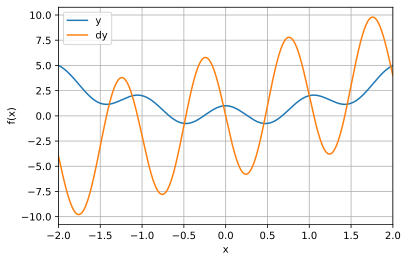

In [2]:
# set
x = [x for x in range(-2,3)]

# function
def fx(x):
    return np.cos(2*np.pi*x) + x**2

# derivative
def df(x):
    return -2*np.pi*np.sin(2*np.pi*x) + 2*x

# plot the func and its derivative
x = np.linspace(-2,2,2001)

plt.plot(x,fx(x), x,df(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

# Perform gradient descent

Initial guess: [0.044]


<ipython-input-3-b0f636b10f20>:16: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i,:] = localmin,grad


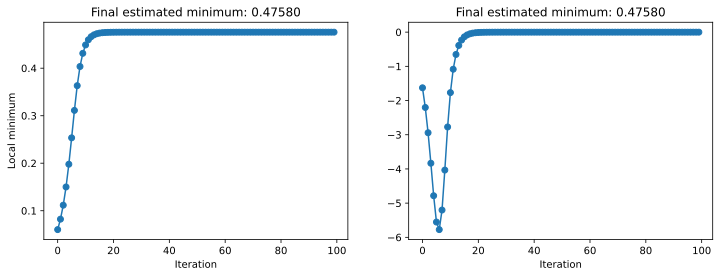

Text(383.27542613636354, 0.5, 'Derivative')

In [3]:
# pick a random starting point
localmin = np.random.choice(x,1)
print(f'Initial guess: {localmin}')

# learning params
learning_rate = 0.01
training_epochs = 100

# store all params
modelparams = np.zeros((training_epochs, 2))

# perform gradient descent
for i in range(training_epochs):
    grad = df(localmin)
    localmin = localmin - learning_rate*grad
    modelparams[i,:] = localmin,grad

# plot the gradient over iterations
fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
    ax[i].plot(modelparams[:,i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')

plt.show()
ax[1].set_ylabel('Derivative')


# Vanishing gradients
Hardocde the initial guess value to be $0$. What happens to the gradient? Does the model learn anything?
> Because our initial localmin is set to $0$, the gradient is also computed to be $0$, since
$$\frac{df}{dx}(0)=0$$. Thus, when we update our localmin value in the training loop, we are actually performing
$$\text{localmin} = \text{localmin} - \text{learning rate} \cdot 0$$
and therefore, the model does not learn anything. This is an extreme case of what are known as _vanishing gradients_.

<ipython-input-4-d5ffa96adf38>:15: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i,:] = localmin,grad


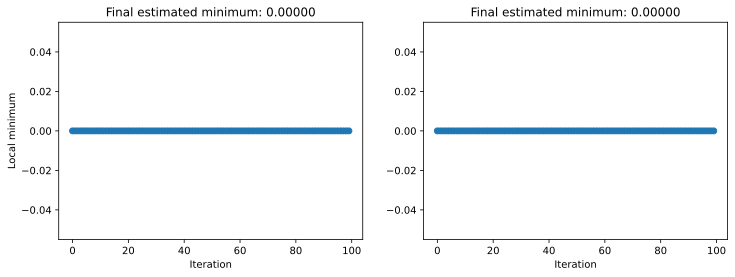

Text(382.11448863636355, 0.5, 'Derivative')

In [4]:
# hardocde the initial guess at 0
localmin = np.array([0])

# learning params
learning_rate = 0.01
training_epochs = 100

# store all params
modelparams = np.zeros((training_epochs, 2))

# perform gradient descent
for i in range(training_epochs):
    grad = df(localmin)
    localmin = localmin - learning_rate*grad
    modelparams[i,:] = localmin,grad

# plot the gradient over iterations
fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
    ax[i].plot(modelparams[:,i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')

plt.show()
ax[1].set_ylabel('Derivative')